In [22]:
#SQLalchemy Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql import func

In [23]:
# Dependencies
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date, timedelta
from  matplotlib.ticker import FuncFormatter

In [24]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [25]:
# Declare a Base 
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [26]:
measurements = Base.classes.measurements
stations = Base.classes.stations

In [27]:
# Create a session
session = Session(engine)

In [28]:
precipitation_data = session.query(measurements).first()
precipitation_data.__dict__

{'ID': 0,
 '_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a1460a4e0>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [29]:

# Display the row's columns and data in dictionary format
station_data = session.query(stations).first()
station_data.__dict__

{'ID': 0,
 '_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a1460bf28>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [30]:
df = pd.DataFrame(session.query(measurements.station,
                                measurements.date,
                                measurements.prcp,
                                measurements.tobs).all())
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,0.03,73


In [31]:
prcp_analysis = df[['date', 'prcp']]
prcp_analysis.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,0.03


In [37]:
prcp_year = prcp_analysis[(prcp_analysis['date'] > '2016-06-06') & (prcp_analysis['date'] <= '2017-06-23')]
prcp_year = prcp_year.sort_values(by='date')

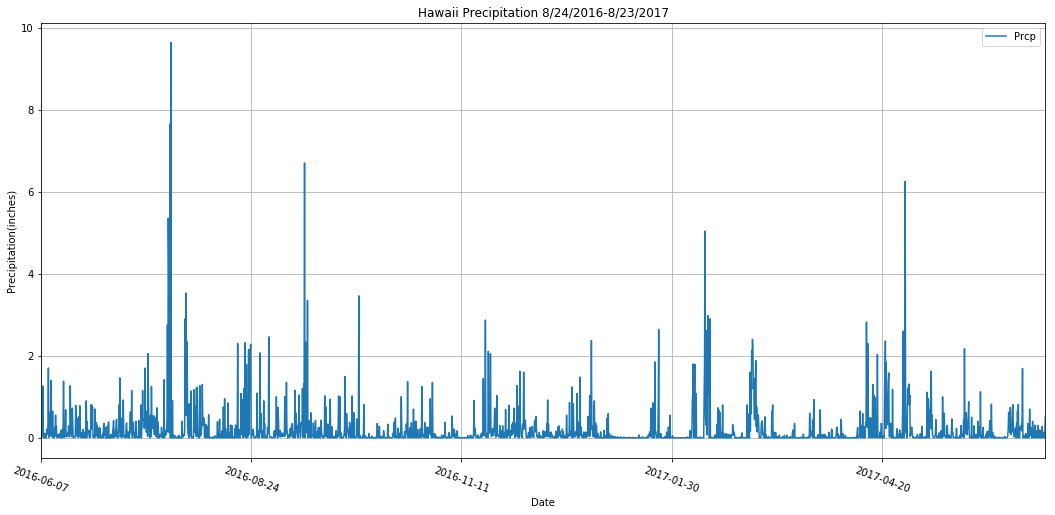

In [38]:
#Plot the dataframe to a horizontal bar chart
prcp_year.plot(x='date', figsize = (18,8), rot = 340)
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.title("Hawaii Precipitation 8/24/2016-8/23/2017")
plt.legend(["Prcp"])
plt.show()

In [39]:
# STATION

In [40]:
station_count = session.query(stations.station).count()
station_count

9

In [42]:
active_stations = session.query(stations.station,
                            stations.name,
                            measurements.station, 
                            func.count(measurements.tobs)).filter(stations.station == measurements.station).group_by(measurements.station).order_by(func.count(measurements.tobs).desc()).all()
active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'USC00514830',
  2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 'USC00517948', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

In [43]:
highest_station = active_stations[0][0:2]
highest_station

('USC00519281', 'WAIHEE 837.5, HI US')

In [45]:
#last 12 months TOBS
top_active_observation = session.query(measurements.station,measurements.tobs).filter(measurements.station == highest_station[0],
                                                                 measurements.date > '2016-08-23').all()

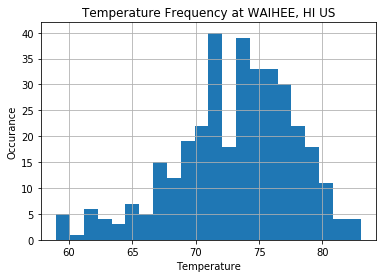

In [47]:
temperature = [x[1] for x in top_active_observation]

                
plt.hist(temperature, bins=22, histtype='stepfilled') #cahrt figsize to be adjusted 
plt.title("Temperature Frequency at WAIHEE, HI US")
plt.grid(True) 
plt.xlabel("Temperature")
plt.ylabel("Occurance")
plt.show()

In [48]:
#TEMPERATURE

In [50]:
temp_analysis = df[['date', 'prcp', 'tobs']]
prcp_year = temp_analysis[(prcp_analysis['date'] > '2016-06-06') & (prcp_analysis['date'] <= '2017-06-23')]
temp_year = prcp_year.sort_values(by='date')
temp_year.head()

,date,prcp,tobs
2286,2016-06-07,0.010000,77
8776,2016-06-07,0.130526,78
7266,2016-06-07,0.010000,75
14530,2016-06-07,0.350000,74
5013,2016-06-07,0.400000,75


In [51]:
def calc_temps(starting_date, ending_date):
    temp = temp_year[(prcp_analysis['date'] > starting_date) & (prcp_analysis['date'] <= ending_date)]
    temp_max = temp.tobs.max()
    temp_min = temp.tobs.min()
    temp_mean = temp.tobs.mean()
    return (temp_max, temp_min, temp_mean)

temp_max, temp_min, temp_mean = calc_temps("2017-03-10", "2017-03-20")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


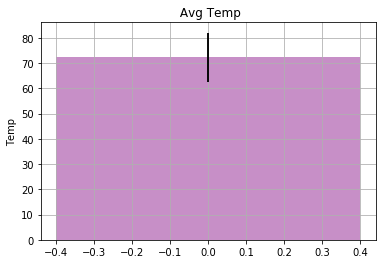

In [53]:
plt.bar(0, temp_mean, color='purple', alpha=.25, yerr=[temp_max - temp_mean])
plt.align = 'center'
plt.figsize = (20,20)
plt.grid(True)
plt.ylabel("Temp")
plt.title(" Avg Temp")
plt.show()